# Can you hear the shape of a drum?
We are concerned with the problem originally posed by Mark Kac, whether we can hear the shape of a drum.  We illustrate this on two drums and show that the eigenvalues are the same even though the shape of the drums is different.

In [2]:
using Pkg
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
using PyPlot

Here are now to

In [4]:
drum1 = [0 0 2 2 3 2 1 1 0;
    0 1 3 2 2 1 1 0 0]
drum2 = [1 0 0 2 2 3 2 1 1;
    0 1 2 2 3 2 1 1 0]

2×9 Array{Int64,2}:
 1  0  0  2  2  3  2  1  1
 0  1  2  2  3  2  1  1  0

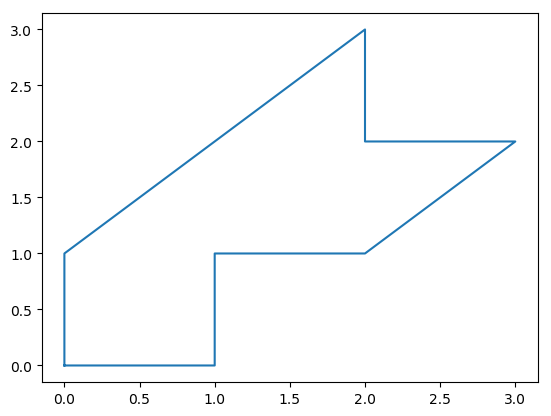

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9760531d68>

In [5]:
plot(drum1[1,:],drum1[2,:])

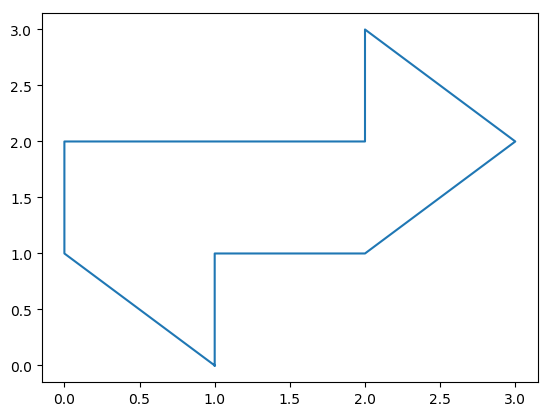

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f97604d16d8>

In [6]:
plot(drum2[1,:],drum2[2,:])

In [7]:
# Compute a discrete spatial description matrix of a polygon given by a number of points
#
# points: 2 x N matrix of N points
# nx, ny: size of the returned matrix
# fillValue: An Int64 that is assigned to the interior of the polygon
#
# The returned matrix's entries will be 0 outside the polygon, 1 on the edges, and fillValue inside the polygon
# 
# Important: setting fillValue != 0 requires the points to be given in a clockwise order

function polygon2mat(points, nx, ny, fillValue = 0)
    N = size(points, 2)

    M = zeros(Int64, ny, nx);

    minx = minimum(points[1,:])
    maxx = maximum(points[1,:])
    miny = minimum(points[2,:])
    maxy = maximum(points[2,:])

    # Transform the points from [minx, maxx] \times [miny, maxy] to [1,nx] \times [1,ny]
    # (writing 1:1 instead of 1 preserves the row matrix format by preventing transformation into a 1D array)
    points = [1 + (nx-1)*(points[1:1,:] - minx)/(maxx - minx);  1 + (ny-1)*(points[2:2,:] - miny)/(maxy - miny)]

    # Fill the entries along the edges with 1's
    xOld = points[1,1]
    yOld = points[2,1]
    for k = 2:N
        xNew = points[1,k]
        yNew = points[2,k]

        # Follow the edge from (xOld, yOld) to (xNew, yNew) and fill entries close to it with 1's
        
        if abs(yOld - yNew) < abs(xOld - xNew)
            xStep = xNew < xOld ? -1 : 1
            for x = round(Int64,xOld):xStep:round(Int64,xNew)
                t = (x - xOld) ./ (xNew - xOld)
                y = round(Int64, t*yNew + (1-t)*yOld)
                M[y,x] = 1
            end
        else
            yStep = yNew < yOld ? -1 : 1
            for y = round(Int64,yOld):yStep:round(Int64,yNew)
                t = (y - yOld) ./ (yNew - yOld)
                x = round(Int64, t*xNew + (1-t)*xOld)
                M[y,x] = 1
            end
        end

        xOld = xNew
        yOld = yNew
    end

    # Fill the interior of the polygon with fillValue
    if fillValue != 0
        # Compute an interior point (requires points to be given in clockwise order)
        
        # Compute center coordinate and unnormalized normal vector of first edge
        centerx = round(Int64, 0.5*(points[1,1] + points[1,2]))
        centery = round(Int64, 0.5*(points[2,1] + points[2,2]))

        normalx = points[2,2] - points[2,1]
        normaly = - points[1,2] + points[1,1]

        # Check for interior point: center coordinate + small step * normal
        # This might fail if an angle is extremely acute and the resolution is too low
        step = 1
        intx, inty = 0, 0
        while true
            if abs(normaly) < abs(normalx)
                intx = centerx + step*Int64(sign(normalx))
                inty = round(Int64, centery + step*normaly/abs(normalx))
            else
                intx = round(Int64, centerx + step*normalx/abs(normaly))
                inty = centery + step*Int64(sign(normaly))
            end
            if M[inty, intx] == 0
                break
            end
            step += 1
        end
        
        # Simple graph coloring. For each point in the queue: Check if it is already colored.
        # If not, color it and add all its neighbors to the queue
        intQueue = [(intx, inty)]
        while !isempty(intQueue)
            (x,y) = pop!(intQueue)
            if M[y,x] == 0
                M[y,x] = fillValue
                push!(intQueue, (x-1,y))
                push!(intQueue, (x+1,y))
                push!(intQueue, (x,y+1))
                push!(intQueue, (x,y-1))
            end
        end
    end
    M
end

polygon2mat (generic function with 2 methods)

In [8]:
function fdlaplacian(G)
    # read info about G
    M, N = size(G)
    nonz = find(G)
    # define function to create a 1D laplacian and a sparse identity
    fdl1(m) = spdiagm((ones(m-1),-2*ones(m),ones(m-1)), [-1,0,1])
    # laplace operator on the full grid
    A = kron(speye(M), fdl1(N)) + kron(fdl1(M), speye(N))
    # return the restriction to the coloured grid points
    return A[nonz, nonz]
    
end

fdlaplacian (generic function with 1 method)

1 with eigenvalues:[-0.0452362, -0.0649907, -0.0919928, -0.115439, -0.128364, -0.162298, -0.186071, -0.202467, -0.216614, -0.229769, -0.25044, -0.278662, -0.29563, -0.308065, -0.332113, -0.363516, -0.370352, -0.386677, -0.409112, -0.424055](721, 721)


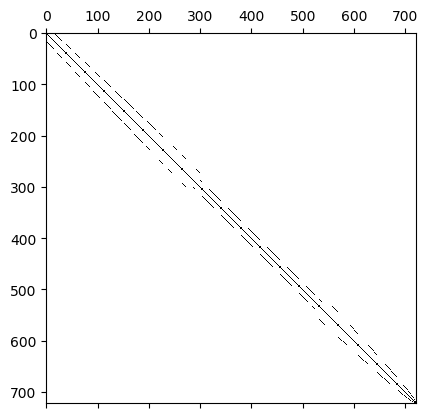

2 with eigenvalues:[-0.0452362, -0.0649907, -0.0919928, -0.115439, -0.128364, -0.162298, -0.186071, -0.202467, -0.216614, -0.229769, -0.25044, -0.278662, -0.29563, -0.308065, -0.332113, -0.363516, -0.370352, -0.386677, -0.409112, -0.424055](721, 721)


In [9]:
resolution = 15;
nx = 3*resolution+1
ny = 3*resolution+1

grid1 = polygon2mat(drum1, nx, ny, 2)
grid2 = polygon2mat(drum2, nx, ny, 2)
grids = [grid1, grid2]
includeEdges = false

ev = Float64[]
laplacian = Float64[]
G = zeros(Int64, size(grids[1]))
for d=1:2
    isinpolygon = includeEdges ? (grids[d] .> 0) : (grids[d] .== 2)
    p = find(isinpolygon)
    numNodes = length(p)
    
    G = zeros(Int64, size(grids[d]))
    G[p] = 1:numNodes;

    laplacian = fdlaplacian(G)
    spy(laplacian)
    (ew,ev)=eigs(laplacian,which=:SM,nev=20)
    println(d," with eigenvalues:",ew,size(laplacian))
end


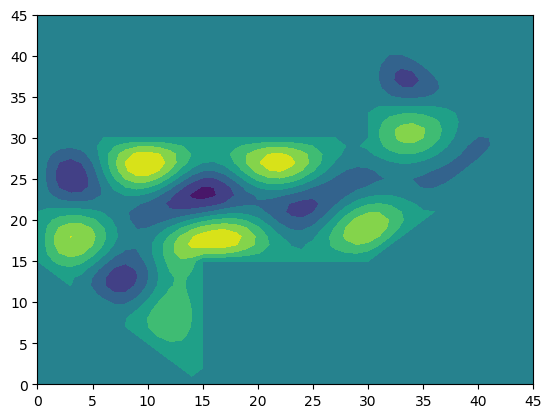

PyObject <matplotlib.contour.QuadContourSet object at 0x7f975e655048>

In [10]:
P=zeros(nx,nx)
for i=1:nx
    for j=1:nx
       if G[i,j]!= 0
          P[i,j]=ev[G[i,j],18]
        #P[i,j]=ev[1,G[i,j]];
        end
    end
end

contourf(P)